# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Bank_Customer_retirement.csv')

In [3]:
dataset.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [4]:
dataset.columns

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [5]:
dataset.shape

(500, 4)

In [6]:
dataset.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [7]:
dataset.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

In [8]:
import seaborn as sns

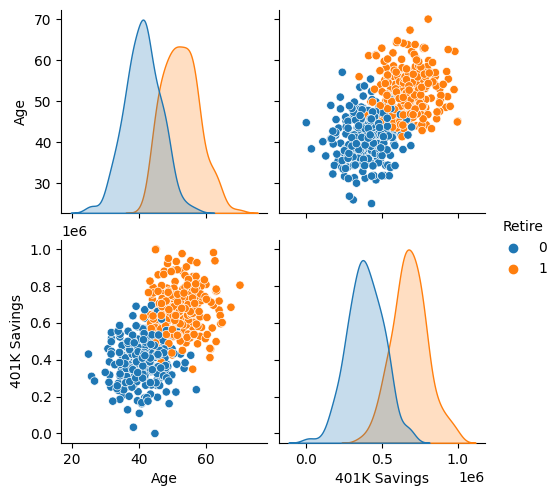

In [9]:
sns.pairplot(data = dataset,hue = 'Retire',vars= ['Age', '401K Savings'] )

<Axes: xlabel='Retire', ylabel='count'>

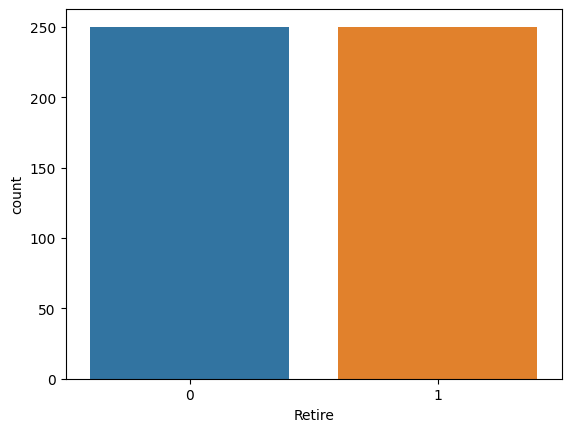

In [10]:
sns.countplot(data = dataset,x = 'Retire',label = 'count')

In [11]:
dataset.isnull().sum()

Customer ID     0
Age             0
401K Savings    0
Retire          0
dtype: int64

<Axes: >

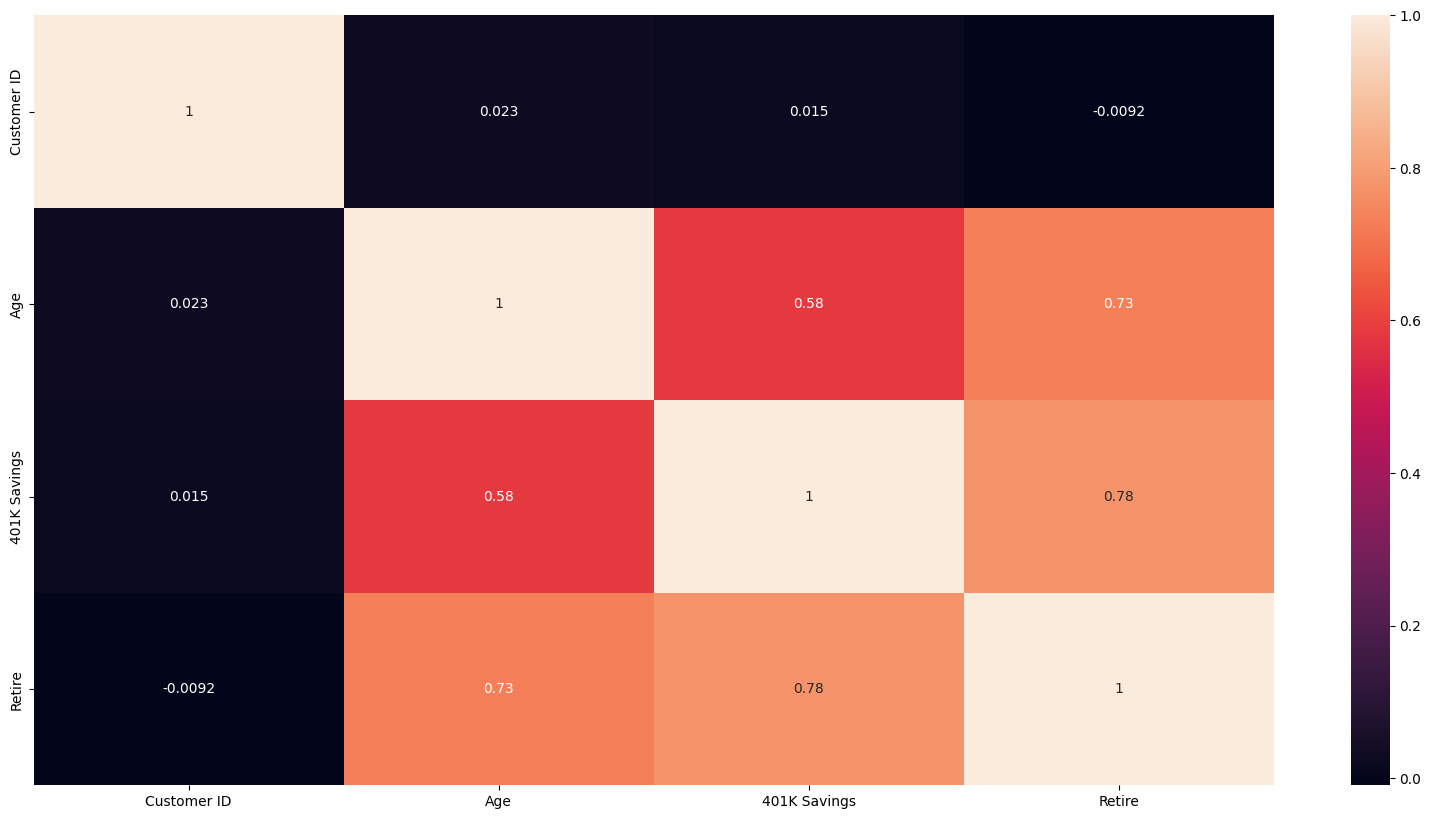

In [12]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dataset.corr(),annot = True)

# STEP #4: MODEL TRAINING 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [14]:

# Let's drop the target label coloumns
dataset.columns
X= dataset.drop(['Customer ID','Retire'],axis = 1)

In [15]:
y = dataset['Retire']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [17]:
X_train.shape

(400, 2)

In [18]:
X_test.shape

(100, 2)

In [19]:
y_train.shape

(400,)

In [20]:
y_test.shape

(100,)

In [21]:
clf = SVC()

In [22]:
clf.fit(X_train,y_train)

SVC()

In [23]:
y_pred = clf.predict(X_test)

# STEP #5: EVALUATING THE MODEL

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[39,  4],
       [ 9, 48]], dtype=int64)

<Axes: >

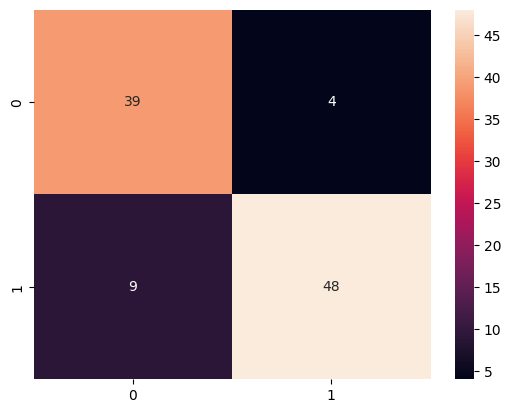

In [26]:
sns.heatmap(cm,annot = True)

In [27]:
print(accuracy_score(y_test,y_pred))

0.87


In [28]:
# for imbalanced dataset,check
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        43
           1       0.92      0.84      0.88        57

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



# STEP #6: IMPROVING THE MODEL

In [29]:
min_train = X_train.min()

In [30]:
min_train

Age             25.0
401K Savings    10.0
dtype: float64

In [31]:
range_train = (X_train-min_train).max()

In [32]:
range_train

Age                 45.0
401K Savings    999990.0
dtype: float64

In [33]:
X_train_scaled = (X_train-min_train)/range_train

In [34]:
X_train

,Age,401K Savings
107,48.590661,700156.0380
336,32.216176,175261.7736
71,45.883970,289943.7487
474,43.368261,408815.1293
6,39.573302,578650.3156
...,...,...
323,37.997489,354267.9230
192,44.914703,996460.5456
117,51.051886,563446.8177
47,49.890388,425910.5239


In [35]:
min_test = X_test.min()

In [36]:
min_test

Age                 25.910672
401K Savings    109281.634500
dtype: float64

In [37]:
range_test = (X_test-min_test).max()

In [38]:
range_test

Age                 41.407536
401K Savings    871268.021200
dtype: float64

In [39]:
X_test_scaled = (X_test-min_test)/range_test

In [40]:
X_test_scaled

,Age,401K Savings
90,0.647981,0.596724
254,0.215271,0.365220
283,0.397837,0.476404
445,0.322917,0.320280
461,0.663191,0.748293
...,...,...
372,0.391712,0.276325
56,0.491488,0.623615
440,0.419550,0.822810
60,0.484390,0.576654


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
svc_model = SVC()
svc_model.fit(X_train_scaled,y_train)

SVC()

In [43]:
y_pred = svc_model.predict(X_test_scaled)

In [44]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  2],
       [ 5, 52]], dtype=int64)

<Axes: >

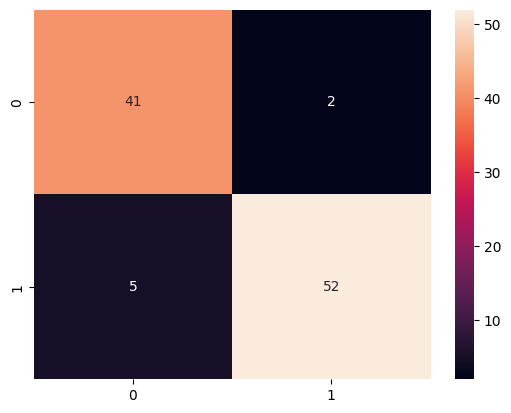

In [45]:
sns.heatmap(cm,annot= True)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.96      0.91      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



# IMPROVING THE MODEL - PART 2

In [97]:
param_grid = {'C': [0.0001,0.001,0.01,0.1, 1,5, 10, 100,500], 'gamma': [1000,500,100,10,1, 0.1, 0.01, 0.001,0.0001], 'kernel': ['rbf']} 


In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)


In [100]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END ..C=0.0001, gamma=1000, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ..C=0.0001, gamma=1000, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ..C=0.0001, gamma=1000, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ..C=0.0001, gamma=1000, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ..C=0.0001, gamma=1000, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END ...C=0.0001, gamma=500, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ...C=0.0001, gamma=500, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ...C=0.0001, gamma=500, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ...C=0.0001, gamma=500, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ...C=0.0001, gamma=500, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END ...C=0.0001, gamma=100, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ...C=0.0001, gamma=100, kernel=rbf

[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ....C=0.01, gam

[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END .......C=5, gamma=1000, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END .......C=5, gamma=1000, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END .......C=5, gamma=1000, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END .......C=5, gamma=1000, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END .......C=5, gam

[CV 2/5] END .......C=100, gamma=10, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END .......C=100, gamma=10, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END .......C=100, gamma=10, kernel=rbf;, score=0.988 total time=   0.0s
[CV 5/5] END .......C=100, gamma=10, kernel=rbf;, score=0.925 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ......C=100, ga

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100, 500],
                         'gamma': [1000, 500, 100, 10, 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [101]:
grid.best_params_

{'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}

In [102]:
grid.best_estimator_

SVC(C=5, gamma=0.01)

In [103]:
grid_predictions = grid.predict(X_test_scaled)

In [104]:
cm = confusion_matrix(y_test, grid_predictions)

In [105]:
cm

array([[40,  3],
       [ 5, 52]], dtype=int64)

In [106]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.95      0.91      0.93        57

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

